In [1]:
import pandas as pd

In [11]:
df = pd.read_csv("Percent_Change_in_Consumer_Spending.csv")

In [12]:
df.shape

(4730, 11)

In [13]:
df.isnull().sum()

State FIPS code                                                                0
Date                                                                           0
All merchant category codes spending                                           0
Accommodation and food service (ACF) spending                                  0
Arts, entertainment, and recreation (AER)  spending                            0
General merchandise stores (GEN) and apparel and accessories (AAP) spending    0
Grocery and food store (GRF)  spending                                         0
Health care and social assistance (HCS) spending                               0
Transportation and warehousing (TWS)  spending                                 0
Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH)        0
Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)             0
dtype: int64

In [14]:
df.columns

Index(['State FIPS code', 'Date', 'All merchant category codes spending',
       'Accommodation and food service (ACF) spending',
       'Arts, entertainment, and recreation (AER)  spending',
       'General merchandise stores (GEN) and apparel and accessories (AAP) spending',
       'Grocery and food store (GRF)  spending',
       'Health care and social assistance (HCS) spending ',
       'Transportation and warehousing (TWS)  spending',
       'Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH) ',
       'Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH) '],
      dtype='object')

In [21]:
df = df.rename(columns={"All merchant category codes spending": "All",
                   "Accommodation and food service (ACF) spending": "ACF",
                   "Arts, entertainment, and recreation (AER)  spending":"AER",
                   "General merchandise stores (GEN) and apparel and accessories (AAP) spending":"GEN&AAP",
                   "Grocery and food store (GRF)  spending":"GRF",
                   "Health care and social assistance (HCS) spending ":"HCS",
                   "Transportation and warehousing (TWS)  spending":"TWS",
                   "Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH) ":"RIG",
                   "Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH) ":"REG"})

In [31]:
sub_df = df.drop(columns={'State FIPS code', 'Date'})
sub_df

All    ACF   AER  GEN&AAP     GRF    HCS     TWS     RIG     REG
0     -1.760  -5.43 -13.8   -5.220  -2.760   0.89   0.466  -3.240  -3.650
1     -0.220  -2.47 -14.0   -2.310   0.309   3.51  -1.920   0.300   0.208
2     -0.560  -3.86 -11.6    0.655  -0.623   4.77   1.230   0.227   1.090
3     -0.373  -3.64 -13.9   -1.460  -0.884   7.91  -0.107  -0.548  -0.256
4     -1.850 -15.00 -19.1   -5.960  -0.105   1.23 -31.200  -4.510  -9.520
...      ...    ...   ...      ...     ...    ...     ...     ...     ...
4725  30.200  21.40  19.2   21.900  29.500  30.10  -1.800  28.900  28.500
4726  32.300  14.70  46.6   27.400  28.700  47.30   6.490  29.500  30.300
4727  44.900  30.80  54.5   52.300  14.000  66.40  57.500  34.000  52.400
4728  30.700  15.30  38.1   31.100  21.100  35.00  18.200  25.600  29.400
4729  33.300   9.90  14.1   14.300  25.200  35.70  97.000  25.700  26.400

[4730 rows x 9 columns]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

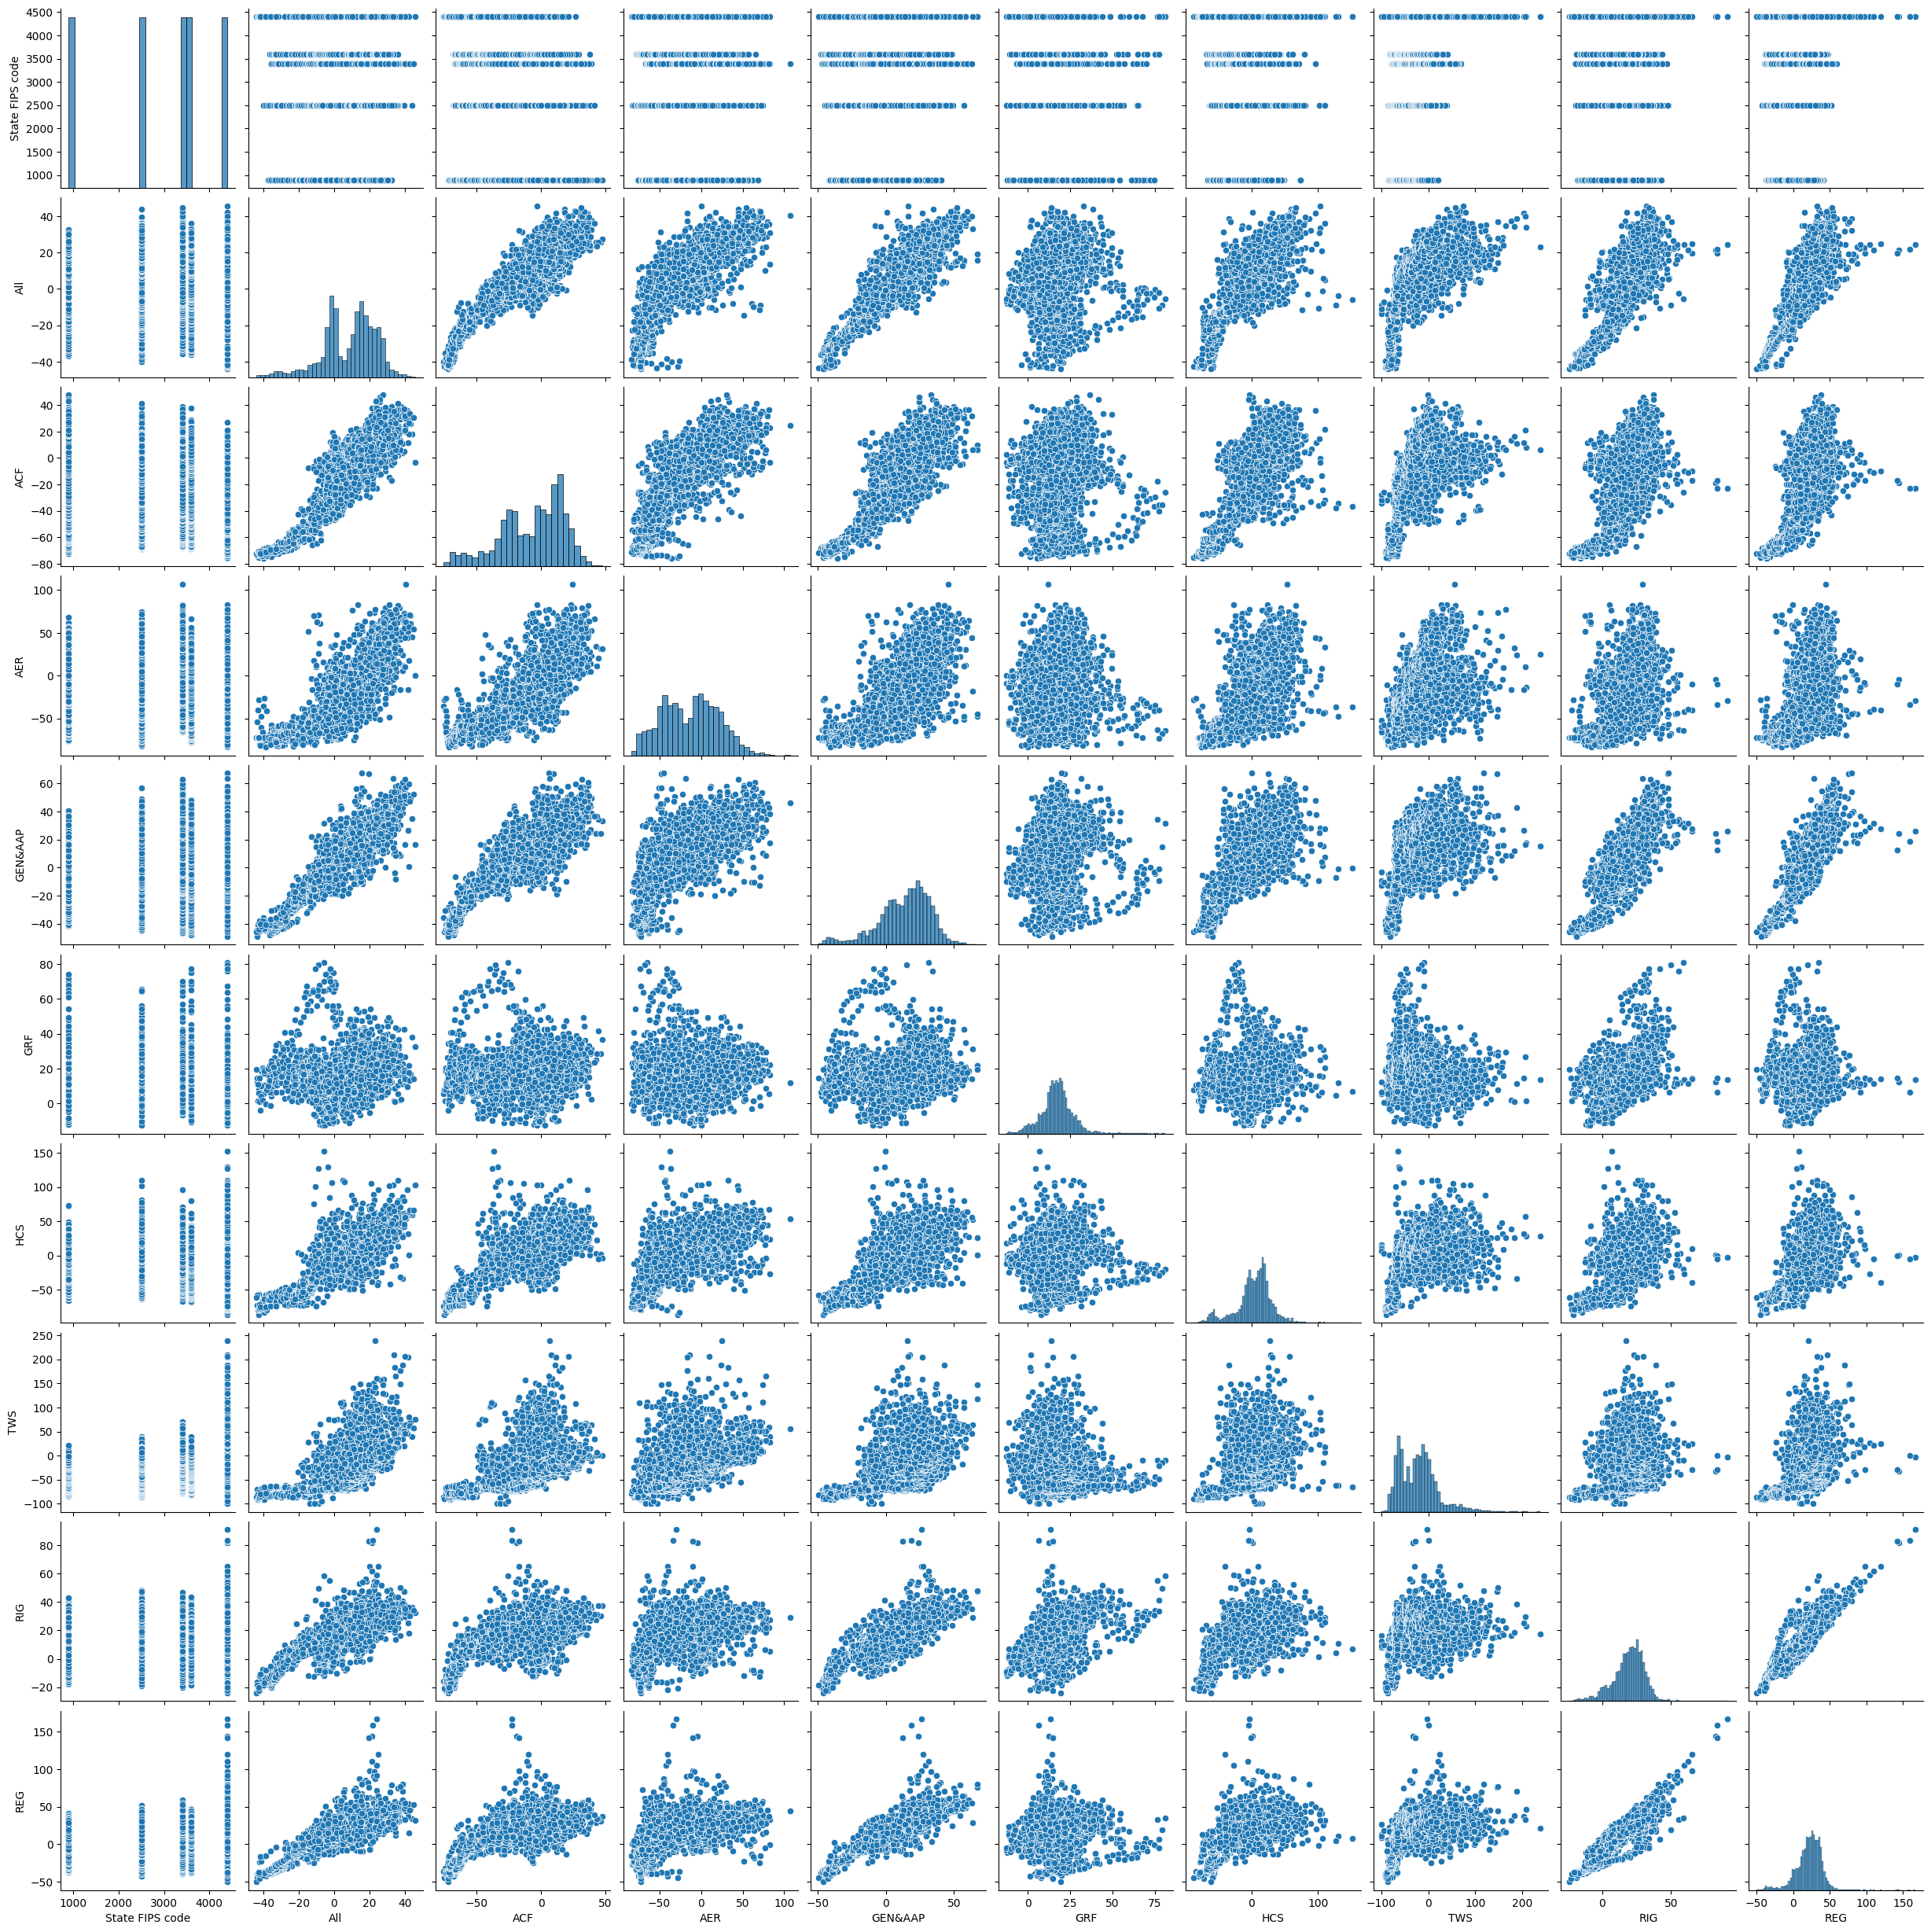

In [25]:
pairplot = sns.pairplot(data=df)

In [29]:
pairplot.fig.savefig('PairPlot.png')

In [32]:
import scipy.cluster.hierarchy as shc

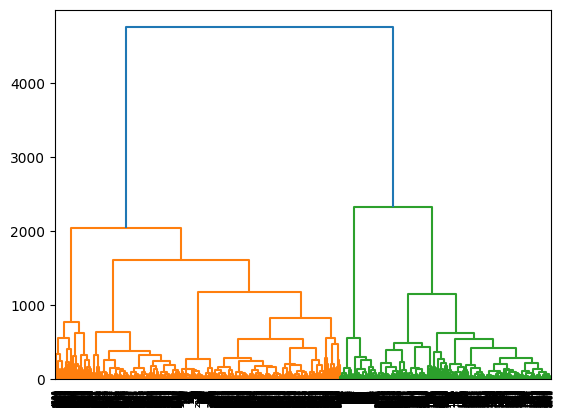

In [34]:
dendrogram = shc.dendrogram(shc.linkage(sub_df, method='ward'))

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
agglo = AgglomerativeClustering(n_clusters=2)

In [41]:
y_agglo = agglo.fit_predict(sub_df)

In [49]:
test_df = sub_df.copy()

In [50]:
test_df['color'] = y_agglo

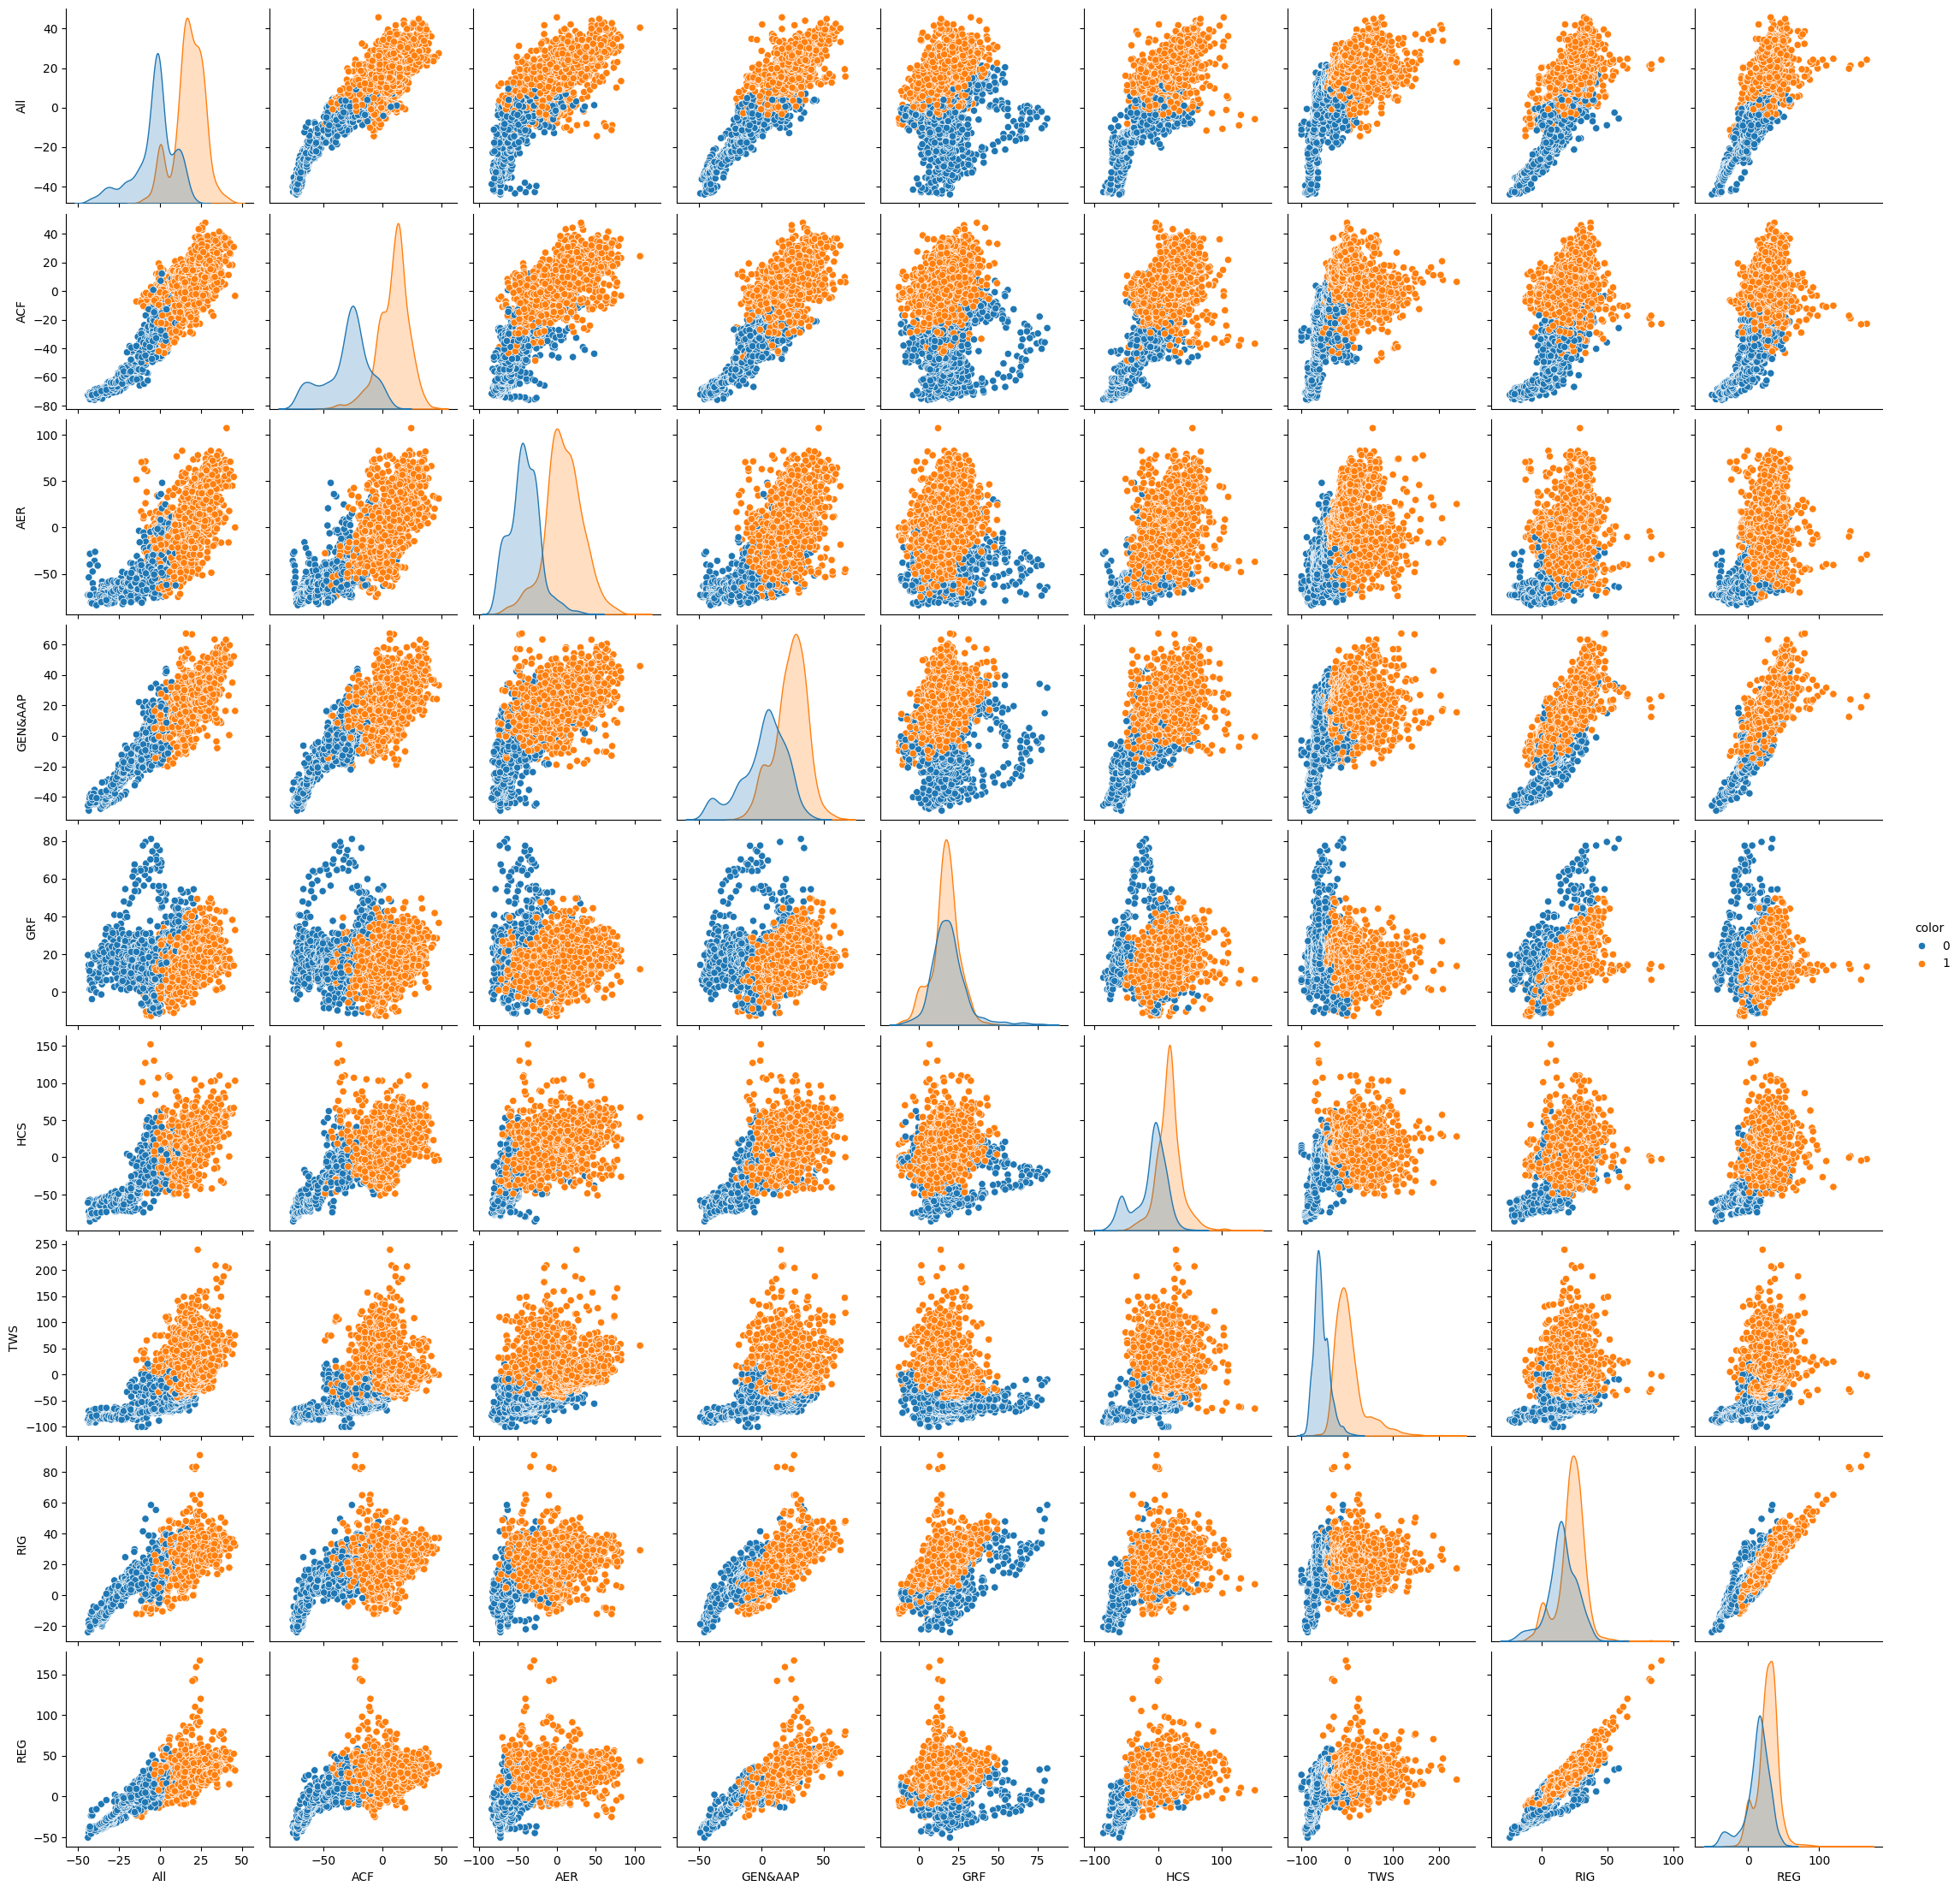

In [52]:
modelpairplot = sns.pairplot(data=test_df, hue='color')